In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

### 累計レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional, Callable

# サードパーティライブラリ
import polars as pl
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

# 前世代機の終息状況比較

次世代機の発売1ヶ月前からの1年間､前世代機の週販がどのように変化するかを比較してみる｡

## 任天堂携帯機



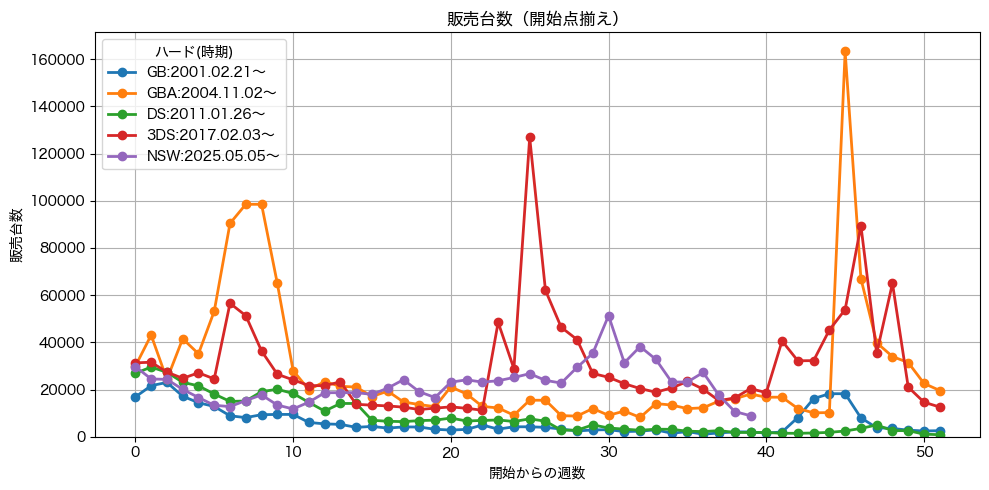

In [6]:
(pso_nintendo_fig, 
 pso_nintendo_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'GB', 'begin': datetime(2001,2,21)},
                              {'hw': 'GBA', 'begin': datetime(2004,11,2)},
                              {'hw': 'DS', 'begin': datetime(2011,1,26)},
                              {'hw': '3DS', 'begin': datetime(2017,2,3)},
                              {'hw': 'NSW', 'begin': datetime(2025,5,5)},
                              ],
                          end = 52)



任天堂の旧世代携帯機の動きには2パターンあります｡

- 次世代機発売以降､急速に売上が低下し終息する｡GB､DSが該当します｡
- 次世代機発売以降も盛り上がるタイミングがあり､終息まで時間がかかる｡ GBA, 3DSが該当します｡

後者については任天堂が旧世代機にテコ入れを行っている影響が大きいです｡

- 2005/9/13(DS発売から10ヶ月後)にGAME BOY micro発売｡45週目近辺のオレンジ色のピークがこれです｡
- 2017/7/13(Switch発売から4ヶ月後)にNew2DSLL発売｡25週目近辺の赤色のピークはこれです｡

互換性がある順当進化の後継機の場合､任天堂は前世代機のテコ入れを行わず､
急速に世代交代が進みます｡
一方､革新的な変化があり､互換性がない場合には､任天堂は前世代機にテコ入れを行い､
前世代機の延命を図ります｡

Nintendo Switch → Switch2の変化は前者なので､
従来通りなら急速に売上が低下し終息するはずです｡
しかし､実際には(テコ入れがないためにピークはないものの)
GBA､3DS終息時に匹敵する高い売上を維持し続けてきました｡
前例に無い動きです｡
Switch2にLiteモデルがないことから､
Switch Liteが代替効かない機種として､GBA,3DSのパターンで推移しているのかも知れません｡



In [7]:
# g.style(pso_nintendo_df, gradient=True)

## 任天堂据え置き機

- N64 2001-08-14
- GC 2006-11-02
- Wii 2012-11-08
- WiiU 2017-02-03
- Switch 2025-05-05

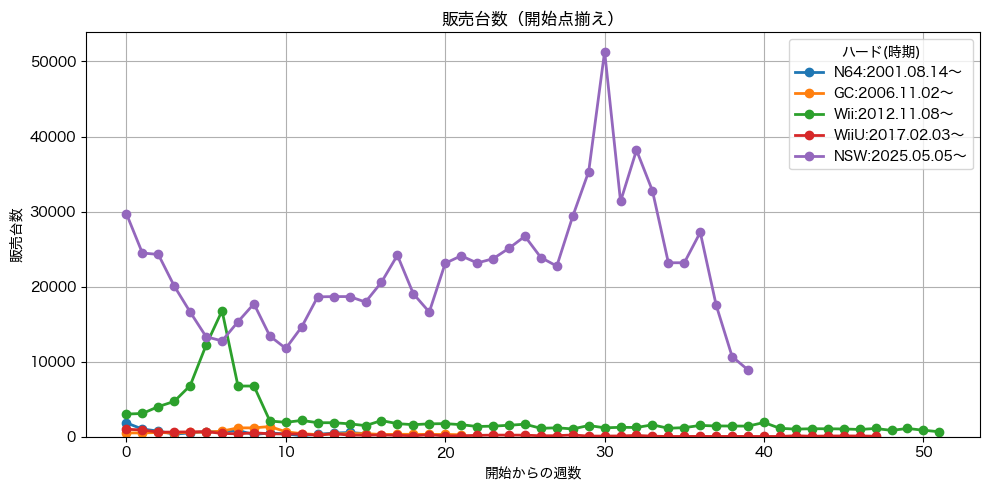

In [8]:
(pso_nintendo_fig, 
 pso_nintendo_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'N64', 'begin': datetime(2001,8,14)},
                              {'hw': 'GC', 'begin': datetime(2006,11,2)},
                              {'hw': 'Wii', 'begin': datetime(2012,11,8)},
                              {'hw': 'WiiU', 'begin': datetime(2017,2,3)},
                              {'hw': 'NSW', 'begin': datetime(2025,5,5)},
                              ],
                          end = 52)



任天堂の据置機は次世代機になる頃には瀕死状態です｡
N64, GCは次世代機発売前から売れ行きが停止しており､次世代機発売後ももちろん動きはありません｡
Wiiは年末商戦で少し盛り上がるも､直後に底辺に落ち込み､その後回復することはありません｡

Switchの動きは「次世代機後の任天堂の据置機」としては初めてのケースです｡
やはりSwitchシリーズは『据置機』ではなく『携帯機』の売れ方をしていると考えた方がいいでしょう｡



## SONY据え置き機

- PS 2000-02-04
- PS2 2006-10-11
- PS3 2014-01-22
- PS4 2020-10-12

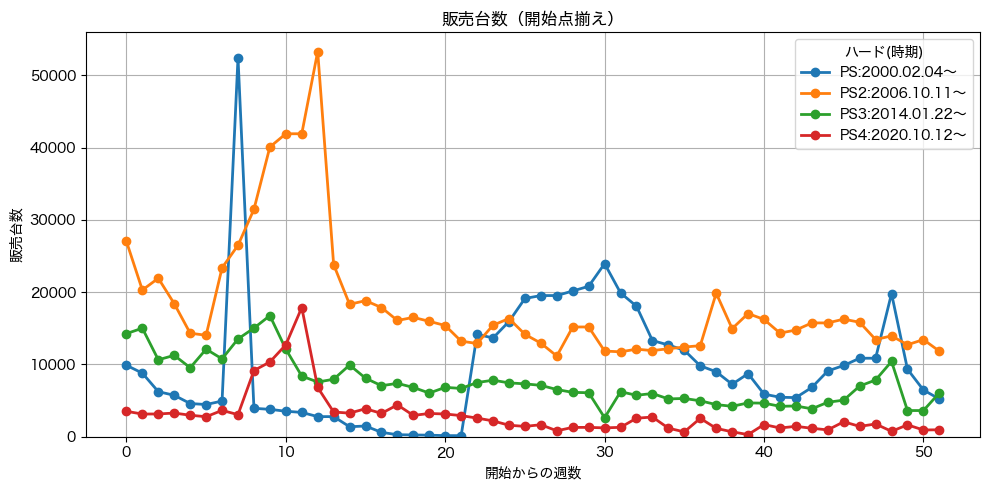

In [9]:
(pso_sony_console_fig, 
 pso_sony_console_df) = g.plot_sales_with_offset(
                              hw_periods=[
                              {'hw': 'PS', 'begin': datetime(2000,2,4)},
                              {'hw': 'PS2', 'begin': datetime(2006,10,11)},
                              {'hw': 'PS3', 'begin': datetime(2014,1,22)},
                              {'hw': 'PS4', 'begin': datetime(2020,10,12)},
                              ],
                          end = 52)



後継機発売後のplaystationシリーズは､任天堂の据置機よりは断然に生き延びています｡
それでも､任天堂の携帯機ほどではありませんが｡

得意な動きをしているのは､青色のラインの初代PSです｡21周目から売上が盛り返しています｡
これは2000/7/7(PS2発売から4ヶ月後)にPS Oneが発売された影響です｡
廉価版テコ入れにより旧機種が盛り上がるパターンです｡

こういった旧機種テコ入れはPS2, PS3, PS4には無く､
徐々に売上が低下していく流れになります｡ただ明らかに
PS2 > PS3 > PS4と､世代を経る毎に旧世代機の売上が下がる傾向があり､
旧世代機が踏ん張れなくなっています｡
